In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

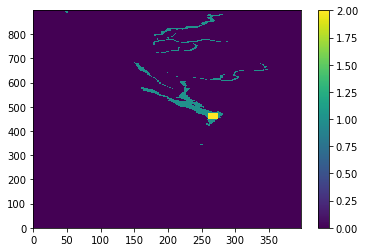

In [3]:
temp=np.copy(tmask[35,:,:])
temp[450:475,260:275]=2
plt.pcolormesh(temp)
plt.colorbar()

In [4]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/sinkTest1_fluxes/'

In [5]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1h_*ptrc_T*.nc')[0])

In [6]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3', 'NH4', 'PHY', 'DIAT', 'Si', 'bSi', 'PON'])

In [7]:
np.shape(e3t_0)

(1, 40, 898, 398)

Input sinking rate: 0.5 -- 1.2 m/d
6.568975995854435 10.304441467850797 11.384244301258205 12.209862738324967
Diagnosed sinking rate:  1.4931157899440346 m/d


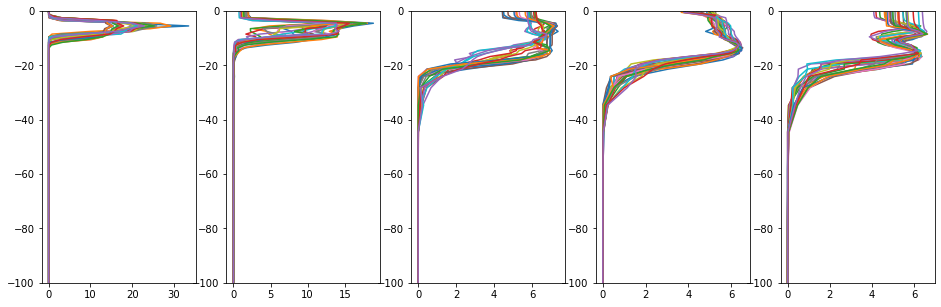

In [8]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(fP.variables['DIAT'][0,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[1].plot(fP.variables['DIAT'][1*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[2].plot(fP.variables['DIAT'][2*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[3].plot(fP.variables['DIAT'][3*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[4].plot(fP.variables['DIAT'][4*24,:,jj,ii],-1*fP.variables['deptht'][:])
for iax in ax:
    iax.set_ylim(-100,0)
print('Input sinking rate: 0.5 -- 1.2 m/d')
z0=np.mean(np.mean(np.nansum(fP.variables['DIAT'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['DIAT'][0*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z1=np.mean(np.mean(np.nansum(fP.variables['DIAT'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['DIAT'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z2=np.mean(np.mean(np.nansum(fP.variables['DIAT'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['DIAT'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z3=np.mean(np.mean(np.nansum(fP.variables['DIAT'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['DIAT'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z4=np.mean(np.mean(np.nansum(fP.variables['DIAT'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['DIAT'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
print(z1,z2,z3,z4)
print('Diagnosed sinking rate: ',(z4-z0)/4,'m/d')

bSi sinking rate: 11.23m/d
16.37105047106298 33.2855417491002 40.21374544615317 56.34214431325411
Diagnosed sinking rate:  12.497487731568025 m/d


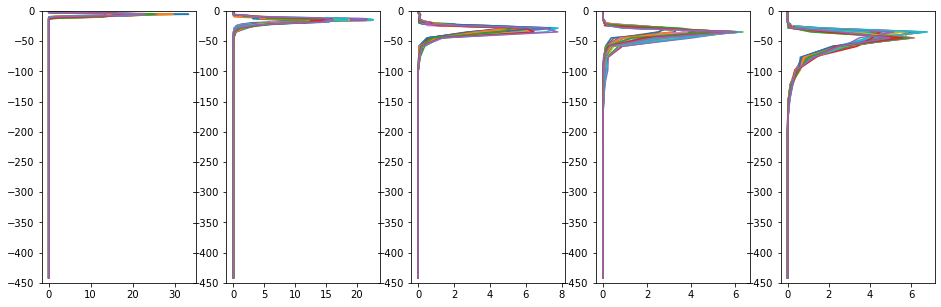

In [9]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(fP.variables['bSi'][0,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[1].plot(fP.variables['bSi'][1*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[2].plot(fP.variables['bSi'][2*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[3].plot(fP.variables['bSi'][3*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[4].plot(fP.variables['bSi'][4*24,:,jj,ii],-1*fP.variables['deptht'][:])
for iax in ax:
    iax.set_ylim(-450,0)
print('bSi sinking rate: 11.23m/d')
z0=np.mean(np.mean(np.nansum(fP.variables['bSi'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['bSi'][0*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z1=np.mean(np.mean(np.nansum(fP.variables['bSi'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['bSi'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z2=np.mean(np.mean(np.nansum(fP.variables['bSi'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['bSi'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z3=np.mean(np.mean(np.nansum(fP.variables['bSi'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['bSi'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z4=np.mean(np.mean(np.nansum(fP.variables['bSi'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['bSi'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
print(z1,z2,z3,z4)
print('Diagnosed sinking rate: ',(z4-z0)/4,'m/d')

PON sinking rate: 8.64 m/d
13.663619403603745 27.31917202331111 33.06100266282583 46.66293255762041
Diagnosed sinking rate:  10.085040894598682 m/d


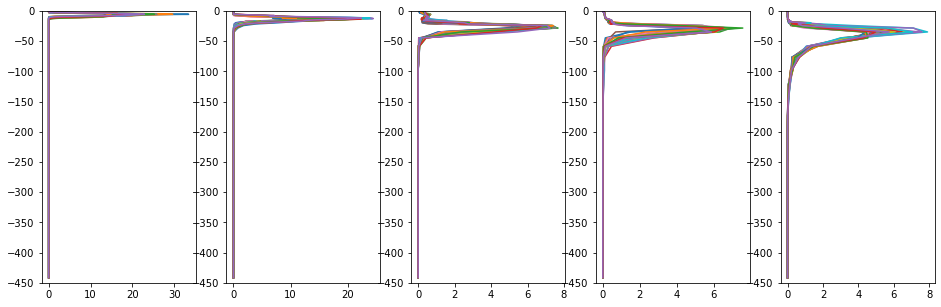

In [10]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(fP.variables['PON'][0,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[1].plot(fP.variables['PON'][1*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[2].plot(fP.variables['PON'][2*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[3].plot(fP.variables['PON'][3*24,:,jj,ii],-1*fP.variables['deptht'][:])
        ax[4].plot(fP.variables['PON'][4*24,:,jj,ii],-1*fP.variables['deptht'][:])
for iax in ax:
    iax.set_ylim(-450,0)
print('PON sinking rate: 8.64 m/d')
z0=np.mean(np.mean(np.nansum(fP.variables['PON'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['PON'][0*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z1=np.mean(np.mean(np.nansum(fP.variables['PON'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['PON'][1*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z2=np.mean(np.mean(np.nansum(fP.variables['PON'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['PON'][2*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z3=np.mean(np.mean(np.nansum(fP.variables['PON'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['PON'][3*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z4=np.mean(np.mean(np.nansum(fP.variables['PON'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(fP.variables['deptht'][:],(40,1,1)),0)/np.sum(fP.variables['PON'][4*24,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
print(z1,z2,z3,z4)
print('Diagnosed sinking rate: ',(z4-z0)/4,'m/d')